###  Using Agglomerative Clustering with Standard Scaler 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./Practice_02.csv')
data.head(5)

,Unnamed: 0,X1,X2
0,0,-1.673506,7.884579
1,1,6.317580,1.419581
2,2,3.543604,0.533119
3,3,5.162714,1.399470
4,4,4.459399,5.166277


In [3]:
data.shape

(1000, 3)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   X1          1000 non-null   float64
 2   X2          1000 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [5]:
data.isnull().mean()*100

Unnamed: 0    0.0
X1            0.0
X2            0.0
dtype: float64

In [6]:
data.duplicated().sum()

0

In [7]:
data.drop(columns='Unnamed: 0',inplace=True)

In [8]:
data.head(5)

,X1,X2
0,-1.673506,7.884579
1,6.317580,1.419581
2,3.543604,0.533119
3,5.162714,1.399470
4,4.459399,5.166277


In [12]:
x = data

In [13]:
sc = StandardScaler()

In [14]:
x = sc.fit_transform(x)

### AgglomerativeClustering

#### Elbow Method

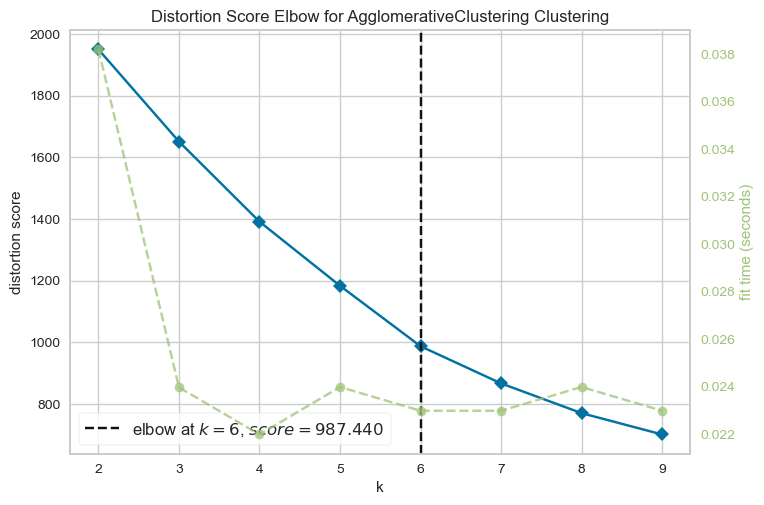

In [17]:
ac = AgglomerativeClustering()
graph = KElbowVisualizer(ac,k = range(2,10))
graph.fit(data)
graph.poof();

In [19]:
ac_6 = AgglomerativeClustering(n_clusters=6)

In [20]:
labels = ac_6.fit_predict(data)

In [21]:
data['cluster_ID'] = labels
data.head(5)

,X1,X2,cluster_ID
0,-1.673506,7.884579,1
1,6.317580,1.419581,4
2,3.543604,0.533119,3
3,5.162714,1.399470,3
4,4.459399,5.166277,2


### Silhouette Score

In [22]:
silhouette_score(data,labels)

0.4921005879712086

### Cluster Visualization

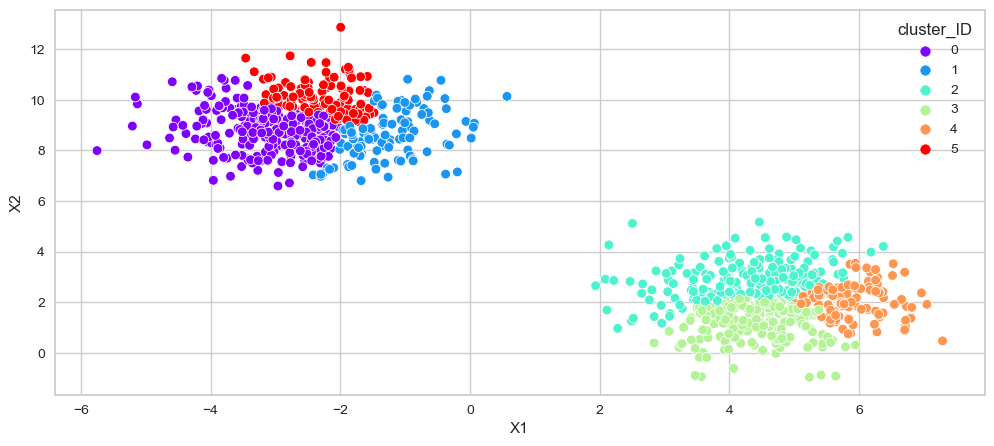

In [24]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=data,x='X1',y='X2',hue='cluster_ID',palette='rainbow')
plt.show()